# **Customer Lifetime Value**
Syauqi Hisyam Shafiyullah [JCAIEAH-002]

Capstone Project 02

[Sumber Data](https://drive.google.com/drive/folders/1GR7l3uWmcOCA2sxx1W-cEkReDxdedoeJ)

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

## **Business Problem Understanding**

**Context**

Perusahaan asuransi kendaraan (Auto Insurance) perlu memahami nilai finansial jangka panjang dari setiap pelanggannya. Metrik ini dikenal sebagai Customer Lifetime Value (CLV). CLV adalah prediksi total pendapatan atau keuntungan yang dapat diperoleh perusahaan dari seorang pelanggan selama masa hubungan bisnis mereka.

Mengetahui CLV sangat penting untuk:
1. Strategi Marketing: Menentukan biaya akuisisi pelanggan (Customer Acquisition Cost) yang wajar.
2. Segmentasi Pelanggan: Mengidentifikasi pelanggan bernilai tinggi (High-Value Customers) untuk diberikan layanan prioritas atau penawaran retensi khusus.
3. Efisiensi Biaya: Mencegah pemborosan biaya pada pelanggan yang memiliki risiko klaim tinggi namun nilai premi rendah.

**Problem Statement**

Perusahaan saat ini memiliki kesulitan dalam menentukan strategi marketing dan retensi yang tepat sasaran karena belum memiliki metode otomatis untuk memprediksi nilai masa depan (future value) dari seorang pelanggan.

Jika perusahaan memperlakukan semua pelanggan secara sama:
1. Risiko Kehilangan Pelanggan Premium: Pelanggan bernilai tinggi mungkin pindah ke kompetitor karena kurangnya insentif atau penawaran khusus.
2. Inefisiensi Biaya: Perusahaan mungkin membuang anggaran marketing untuk mempertahankan pelanggan yang sebenarnya merugikan (klaim tinggi, CLV rendah).

Oleh karena itu, perusahaan membutuhkan sebuah model Machine Learning yang dapat memprediksi nilai Customer Lifetime Value berdasarkan profil dan riwayat polis pelanggan.

**Goals**

Tujuan utama dari proyek ini adalah:
1. Membangun model Regresi yang akurat untuk memprediksi angka Customer Lifetime Value (CLV) dari setiap pelanggan.
2. Mengetahui faktor-faktor atau fitur apa saja yang paling mempengaruhi tinggi rendahnya CLV seorang pelanggan.
3. Memberikan wawasan bisnis kepada tim marketing untuk merancang strategi promosi yang lebih efektif berdasarkan segmen nilai pelanggan.

**Analytic Apporach**

Karena target variabel Customer Lifetime Value adalah berupa angka kontinu (nilai uang), maka masalah ini akan diselesaikan menggunakan pendekatan Supervised Learning dengan metode Regresi (Regression).

Langkah yang akan dilakukan:
1. Menganalisis data (EDA) untuk menemukan pola fitur.
2. Melakukan Data Preprocessing agar data siap digunakan oleh model (termasuk encoding fitur kategori dan scaling fitur numerik).
3. Melatih beberapa model regresi (seperti Linear Regression, KNN, Decision Tree, Random Forest, XGBoost).
4. Memilih model terbaik berdasarkan metrik evaluasi.

**Metric Evaluation**

Untuk mengevaluasi performa model regresi, metrik yang akan digunakan adalah:
1. RMSE (Root Mean Squared Error): Untuk mengetahui seberapa jauh rata-rata prediksi meleset dari nilai aslinya, dengan memberikan bobot lebih pada kesalahan (error) yang besar.
2. MAE (Mean Absolute Error): Rata-rata selisih mutlak antara nilai prediksi dan aktual. Ini memberikan gambaran error yang lebih mudah diinterpretasikan secara langsung.
3. MAPE (Mean Absolute Percentage Error): Rata-rata persentase kesalahan prediksi. Metrik ini sangat berguna untuk menjelaskan akurasi model kepada pihak bisnis (non-teknis) karena sifatnya relatif (dalam persen).

Semakin kecil nilai RMSE, MAE, dan MAPE, semakin akurat model dalam memprediksi CLV.

****

## **Data Understanding**

- Dataset merupakan data asuransi kendaraan (Auto Insurance)
- Setiap baris data merepresentasikan informasi terkait profil pelanggan, polis asuransi, dan data finansial

In [20]:
# Eksplorasi data awal

#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Load Data
df = pd.read_csv('data_customer_lifetime_value.csv')
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [21]:
# Cek informasi dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB
None


In [22]:
# Cek Statistik Deskriptif
display(df.describe())

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


In [23]:
# Cek Data Unik di Kolom Kategorikal
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Vehicle Class: ['Four-Door Car' 'Two-Door Car' 'SUV' 'Sports Car' 'Luxury SUV'
 'Luxury Car']
Unique values in Coverage: ['Extended' 'Basic' 'Premium']
Unique values in Renew Offer Type: ['Offer1' 'Offer3' 'Offer2' 'Offer4']
Unique values in EmploymentStatus: ['Retired' 'Employed' 'Disabled' 'Medical Leave' 'Unemployed']
Unique values in Marital Status: ['Divorced' 'Married' 'Single']
Unique values in Education: ['High School or Below' 'College' 'Master' 'Bachelor' 'Doctor']


### **Exploratory Data Analysis**

**Analisis Target (Customer Lifetime Value)**

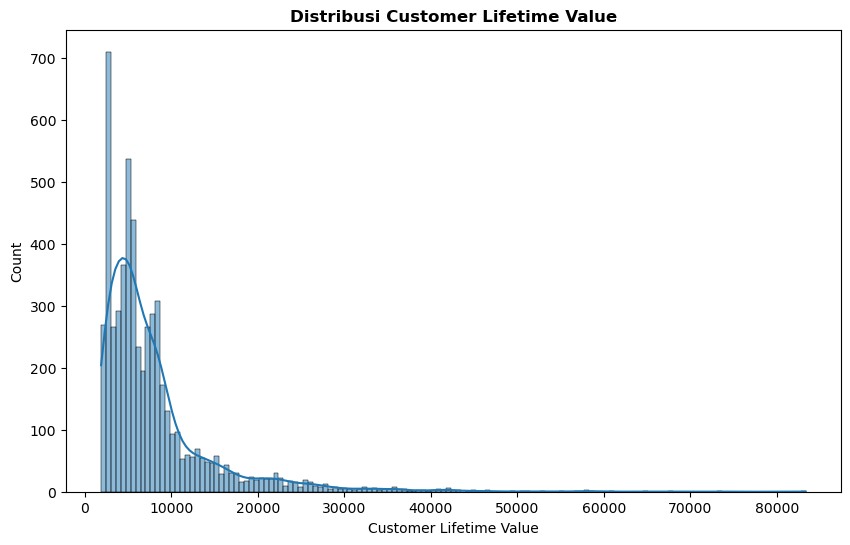

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Customer Lifetime Value'], kde=True)
plt.title('Distribusi Customer Lifetime Value', weight='bold')
plt.show()

Berdasarkan plot distribusi CLV di atas, terlihat bahwa data tersebut 'Right Skewed'. Ada sebagian kecil pelanggan dengan nilai CLV tang sangat tinggi (sultan/high values/outliers)

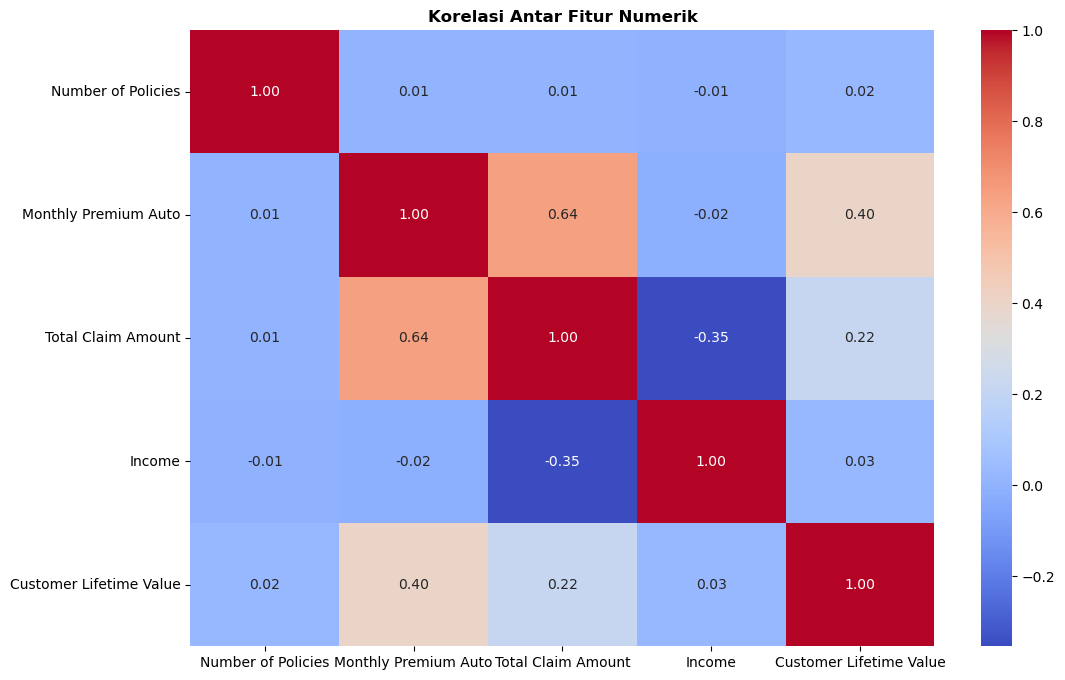

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Fitur Numerik', weight='bold')
plt.show()

Berdasarkan Heatmap Korelasi, fitur numerik yang memiliki pengaruh linear terkuat terhadap target (CLV) adalah Monthly Premium Auto (0.40). Selain itu, terlihat adanya korelasi positif antara Monthly Premium Auto dan Total Claim Amount (0.64), yang menandakan bahwa kendaraan dengan premi tinggi cenderung memiliki biaya klaim yang tinggi pula, namun level korelasi ini masih aman dari multikolinearitas berat.

## **Data Preprocessing**

Langkah ini membersihkan dan mempersiapkan data agar siap dimasukkan ke model.

**Data Cleaning**

In [27]:
# Cek Duplikat
print(f"Jumlah duplikat awal: {df.duplicated().sum()}")

# Hapus Duplikat
df.drop_duplicates(inplace=True)

# Reset Index
df.reset_index(drop=True, inplace=True)

print(f"Jumlah duplikat setelah dihapus: {df.duplicated().sum()}")

Jumlah duplikat awal: 618
Jumlah duplikat setelah dihapus: 0


**Data Splitting**

In [28]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Customer Lifetime Value'])
y = df['Customer Lifetime Value']

# Split 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah Data Train: {X_train.shape}")
print(f"Jumlah Data Test : {X_test.shape}")

Jumlah Data Train: (4040, 10)
Jumlah Data Test : (1011, 10)


**Encoding & Scaling**

Mengubah data kategori menjadi angka dan menyamakan skala data numerik.
- Ordinal Encoding: Untuk data bertingkat (Education, Coverage).
- One-Hot Encoding: Untuk data nominal (Vehicle Class, Marital Status, dll).
- Robust Scaler: Untuk data numerik, agar lebih tahan terhadap outliers dibandingkan Standard Scaler.

In [29]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

ordinal_cols = ['Education', 'Coverage']
onehot_cols = ['Vehicle Class', 'Renew Offer Type', 'EmploymentStatus', 'Marital Status']
numerical_cols = ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']

education_order = ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']
coverage_order = ['Basic', 'Extended', 'Premium']

ordinal_transformer = OrdinalEncoder(categories=[education_order, coverage_order])
onehot_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')
numeric_transformer = RobustScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', ordinal_transformer, ordinal_cols),
        ('onehot', onehot_transformer, onehot_cols),
        ('num', numeric_transformer, numerical_cols)
    ], remainder='drop')

Contoh data setelah diproses:

In [30]:
# Mengambil 1 contoh data mentah dari X_train
contoh_data = X_train.iloc[[0]]

print("=== DATA MENTAH (SEBELUM) ===")
display(contoh_data)

contoh_data_transformed = preprocessor.fit(X_train).transform(contoh_data)

print("\n=== DATA HASIL PREPROCESSING (SESUDAH) ===")

new_feature_names = (
    ordinal_cols +
    list(preprocessor.named_transformers_['onehot'].get_feature_names_out(onehot_cols)) +
    numerical_cols
)

df_contoh_hasil = pd.DataFrame(contoh_data_transformed, columns=new_feature_names)
display(df_contoh_hasil)

=== DATA MENTAH (SEBELUM) ===


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income
1025,Four-Door Car,Basic,Offer4,Employed,Married,College,7.0,64.0,307.2,23840.0



=== DATA HASIL PREPROCESSING (SESUDAH) ===


,Education,Coverage,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Marital Status_Married,Marital Status_Single,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.666667,-0.439024,-0.230758,-0.172492


## **Modeling**

Pada tahap ini, kita akan melatih beberapa algoritma Machine Learning untuk memprediksi Customer Lifetime Value. Proses ini dibagi menjadi beberapa tahap:
1. Model Benchmarking: Mencoba berbagai algoritma standar dengan parameter default untuk melihat algoritma mana yang paling potensial.
2. Hyperparameter Tuning: Mengambil algoritma terbaik dan mencari kombinasi parameter optimal untuk meningkatkan performa.
3. Final Evaluation: Menguji model akhir pada data Test Set yang belum pernah dilihat sebelumnya.

**Model Benchmarking**

In [44]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV

# Import Model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models = [
    ('Linear Regression', LinearRegression()),
    ('KNN', KNeighborsRegressor()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('XGBoost', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))
]

results = []
history_performa = []

scoring_metrics = {
    'RMSE': 'neg_root_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'MAPE': 'neg_mean_absolute_percentage_error'
}

print("\nProcessing...")

for name, model in models:
    model_pipeline = Pipeline([
        ('preprocessor', preprocessor), 
        ('estimator', model)
    ])
    
    try:
        cv_results = cross_validate(
            model_pipeline, 
            X, y, 
            cv=5, 
            scoring=scoring_metrics,
            n_jobs=-1,
            error_score='raise'
        )
        
        rmse_scores_1 = -1 * cv_results['test_RMSE']
        mae_scores_1 = -1 * cv_results['test_MAE']
        mape_scores_1 = -1 * cv_results['test_MAPE']
        
        results.append({
            'Model': name,
            'Mean RMSE': rmse_scores_1.mean(),
            'Std RMSE': rmse_scores_1.std(),
            'Mean MAE': mae_scores_1.mean(),
            'Std MAE': mae_scores_1.std(),
            'Mean MAPE': mape_scores_1.mean(),
            'Std MAPE': mape_scores_1.std()
        })
        
        history_performa.append({
            'Model': name,
            'Stage': 'Before Tuning', # Penanda bahwa ini hasil default
            'RMSE': rmse_scores_1.mean(),
            'MAE':  mae_scores_1.mean(),
            'MAPE': mape_scores_1.mean()
        })
        print(f"{name} selesai.")
        
    except Exception as e:
        print(f"{name} Gagal: {e}")

if results:
    df_results = pd.DataFrame(results)
    
    df_results = df_results.sort_values(by='Mean MAPE', ascending=True)
    
    print("\n=== HASIL BENCHMARKING LENGKAP ===")
    pd.set_option('display.float_format', '{:.4f}'.format)
    display(df_results)
else:
    print("Tidak ada model yang berhasil dijalankan.")


Processing...
Linear Regression selesai.
KNN selesai.
Decision Tree selesai.
Random Forest selesai.
XGBoost selesai.

=== HASIL BENCHMARKING LENGKAP ===


,Model,Mean RMSE,Std RMSE,Mean MAE,Std MAE,Mean MAPE,Std MAPE
3,Random Forest,4117.3112,168.2779,1686.8737,74.2617,0.1232,0.0086
2,Decision Tree,5552.3931,308.9008,2009.5413,110.5759,0.1483,0.0072
4,XGBoost,4326.4198,253.3705,2126.4590,88.7909,0.2172,0.0134
1,KNN,6631.2350,202.0753,3895.4693,140.1317,0.5575,0.0221
0,Linear Regression,6336.7349,195.4720,3897.4531,98.2394,0.5906,0.0124


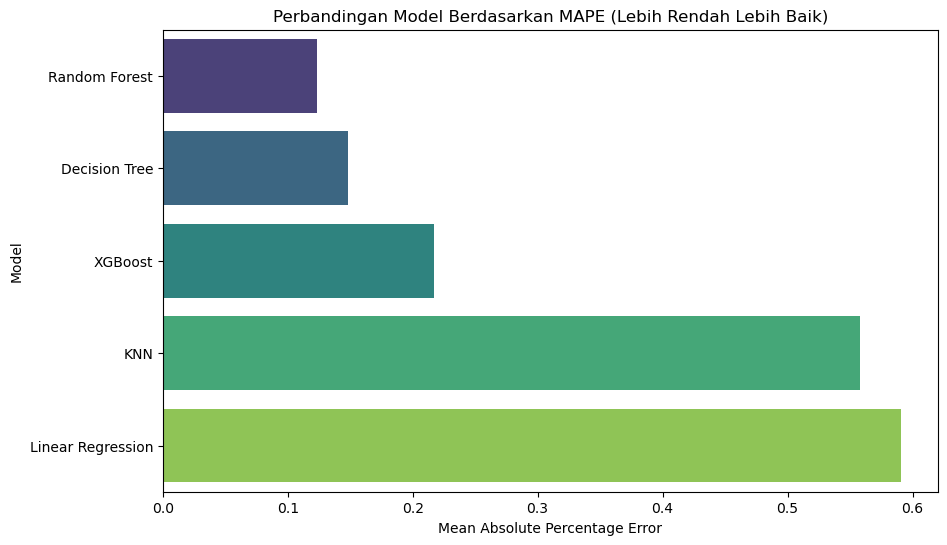

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Mean MAPE', y='Model', data=df_results, palette='viridis')
plt.title('Perbandingan Model Berdasarkan MAPE (Lebih Rendah Lebih Baik)')
plt.xlabel('Mean Absolute Percentage Error')
plt.show()

Grafik di atas memvisualisasikan hasil benchmarking awal terhadap lima model Machine Learning menggunakan metrik MAPE (Mean Absolute Percentage Error). Dalam grafik ini, semakin pendek batang (bar), semakin rendah tingkat kesalahan, yang berarti performa model semakin baik.

Berdasarkan hasil pengujian, terlihat pola yang sangat jelas bahwa algoritma berbasis Tree (Pohon Keputusan) jauh mengungguli metode lainnya. Random Forest memimpin sebagai model dengan akurasi baseline terbaik (MAPE ~12%), disusul ketat oleh Decision Tree dan XGBoost. Ketiga model ini mampu menangkap kompleksitas data dengan baik.

Sebaliknya, Linear Regression dan KNN menunjukkan performa yang sangat buruk dengan tingkat kesalahan di atas 50%. Tingginya error pada Linear Regression mengindikasikan bahwa hubungan antar fitur dalam dataset ini bersifat non-linear, sehingga tidak bisa dipetakan oleh garis lurus sederhana. Sementara itu, kegagalan KNN menunjukkan bahwa data memiliki dimensi yang kompleks yang sulit diatasi oleh algoritma berbasis jarak.

Mengingat selisih performa yang kompetitif antara tiga model teratas, hasil baseline ini belum bisa dijadikan keputusan final. Oleh karena itu, saya memilih 3 terbaik untuk dilakukan hyperparameter tuning untuk membuktikan mana yang sebenarnya terbaik setelah dilakukan tuning.

**Hypermeter Tuning**

In [41]:
#Parameter Random Forest
rf_params = {
    'estimator__n_estimators': [100, 200, 300, 500],
    'estimator__max_depth': [None, 10, 20, 30],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__max_features': ['sqrt', 'log2', None]
}

#Parameter Decision Tree
dt_params = {
    'estimator__max_depth': [None, 10, 20, 30, 40],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__criterion': ['squared_error', 'absolute_error']
}

#Parameter XGBoost
xgb_params = {
    'estimator__n_estimators': [100, 500, 1000],
    'estimator__learning_rate': [0.01, 0.05, 0.1, 0.3],
    'estimator__max_depth': [3, 5, 6, 10],
    'estimator__subsample': [0.7, 0.8, 1.0],
    'estimator__colsample_bytree': [0.7, 0.8, 1.0]
}

tuning_list = [
    ('Random Forest', RandomForestRegressor(random_state=42), rf_params),
    ('Decision Tree', DecisionTreeRegressor(random_state=42), dt_params),
    ('XGBoost', xgb.XGBRegressor(objective='reg:squarederror', random_state=42), xgb_params)
]
tuning_results = [] 

print("Mulai Hyperparameter Tuning...")

for name, model, params in tuning_list:
    print(f"\nSedang tuning: {name}...")
    
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('estimator', model)
    ])
    
    random_search = RandomizedSearchCV(
        pipeline,
        param_distributions=params,
        n_iter=20, 
        cv=5, 
        scoring='neg_mean_absolute_percentage_error',
        n_jobs=-1,
        random_state=42,
        verbose=0 
    )
    
    random_search.fit(X, y)

    best_mape = -1 * random_search.best_score_

    tuning_results.append({
        'Model': name,
        'Best MAPE': best_mape,
        'Best Params': random_search.best_params_
    })
    
    print(f"{name} Selesai! (MAPE: {best_mape:.4f})")

print("\n" + "="*40)
print("   HASIL AKHIR HYPERPARAMETER TUNING")
print("="*40)

df_tuning = pd.DataFrame(tuning_results)

df_tuning = df_tuning.sort_values(by='Best MAPE', ascending=True).reset_index(drop=True)

pd.set_option('display.max_colwidth', None)
display(df_tuning[['Model', 'Best MAPE']])


Mulai Hyperparameter Tuning...

Sedang tuning: Random Forest...
Random Forest Selesai! (MAPE: 0.1187)

Sedang tuning: Decision Tree...
Decision Tree Selesai! (MAPE: 0.1046)

Sedang tuning: XGBoost...
XGBoost Selesai! (MAPE: 0.1272)

   HASIL AKHIR HYPERPARAMETER TUNING


,Model,Best MAPE
0,Decision Tree,0.1046
1,Random Forest,0.1187
2,XGBoost,0.1272


Berikut adalah penjelasannya dalam 2 paragraf yang padat dan langsung pada intinya:

Hasil hyperparameter tuning menampilkan kejutan menarik di mana Decision Tree melesat ke posisi pertama dengan MAPE terendah (0.1046), mengungguli Random Forest yang sebelumnya mendominasi. Hal ini terjadi karena Decision Tree sangat sensitif terhadap optimasi parameter; ketika dikonfigurasi dengan tepat (seperti membatasi kedalaman pohon), model ini menjadi sangat efisien dan mampu membuang noise, sedangkan Random Forest hanya mengalami peningkatan tipis karena performa dasarnya memang sudah stabil sejak awal.

Namun, keunggulan angka di fase validasi ini belum bisa dijadikan keputusan final tanpa bukti lebih lanjut. Oleh karena itu, langkah krusial berikutnya adalah menguji model-model terbaik ini pada Data Test (unseen data) untuk membuktikan apakah akurasi tinggi Decision Tree tersebut benar-benar konsisten dan valid saat menghadapi data baru, atau hanya kebetulan semata.

**Data Test**

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
models_to_test = []

for index, row in df_tuning.iterrows():
    name = row['Model']
    params = row['Best Params']
    
    clean_params = {k.replace('estimator__', ''): v for k, v in params.items()}
    
    if name == 'Decision Tree':
        model = DecisionTreeRegressor(**clean_params)
    elif name == 'Random Forest':
        model = RandomForestRegressor(**clean_params)
    elif name == 'XGBoost':
        model = xgb.XGBRegressor(**clean_params)
    
    models_to_test.append((name, model))
    
test_results = []
after_performa = []
best_models = {}

print("Mulai pengujian pada Data Test...")

for name, model in models_to_test:
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    best_models[name] = pipeline
    y_pred = pipeline.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    test_results.append({
        'Model': name,
        'Test RMSE': rmse,
        'Test MAE': mae,
        'Test MAPE': mape
    })
    
    after_performa.append({
            'Model': name,
            'Stage': 'After Tuning',
            'RMSE': rmse,
            'MAE': mae,
            'MAPE': mape
    })

df_test_results = pd.DataFrame(test_results)
df_test_results = df_test_results.sort_values(by='Test MAPE', ascending=True)

print("\n=== PERFORMA MODEL PADA DATA TEST ===")
pd.set_option('display.float_format', '{:.4f}'.format)
display(df_test_results)

Mulai pengujian pada Data Test...

=== PERFORMA MODEL PADA DATA TEST ===


,Model,Test RMSE,Test MAE,Test MAPE
0,Decision Tree,4532.8792,1500.7480,0.0953
1,Random Forest,3931.4890,1561.3426,0.1178
2,XGBoost,3854.6355,1570.7076,0.1238


Berdasarkan evaluasi komprehensif pada Data Test, Decision Tree Regressor (Tuned) dipilih sebagai model final. Model ini tidak hanya memiliki akurasi tertinggi (MAPE 9.5%), tetapi juga menunjukkan efektivitas tuning yang signifikan, membuktikan bahwa struktur data ini paling baik dijelaskan oleh aturan keputusan (decision rules) yang telah dioptimasi, dibandingkan metode ensemble yang lebih kompleks.

Nilai RMSE dan MAE yang tinggi disebabkan oleh data dari pelanggan outlier atau high-value customer. Menyebabkan selisih error maksimal jadi bisa membengkak.

In [60]:
df_before = pd.DataFrame(history_performa)
df_after = pd.DataFrame(after_performa)

model_pilihan = ['Decision Tree', 'Random Forest', 'XGBoost']

df_before = df_before[df_before['Model'].isin(model_pilihan)]
df_after = df_after[df_after['Model'].isin(model_pilihan)]

df_combined = pd.concat([df_before, df_after], ignore_index=True)

sns.set_style("whitegrid")

colors_rmse = {'Before Tuning': '#95a5a6', 'After Tuning': '#e74c3c'} # Merah
colors_mae  = {'Before Tuning': '#95a5a6', 'After Tuning': '#3498db'} # Biru
colors_mape = {'Before Tuning': '#95a5a6', 'After Tuning': '#2ecc71'} # Hijau

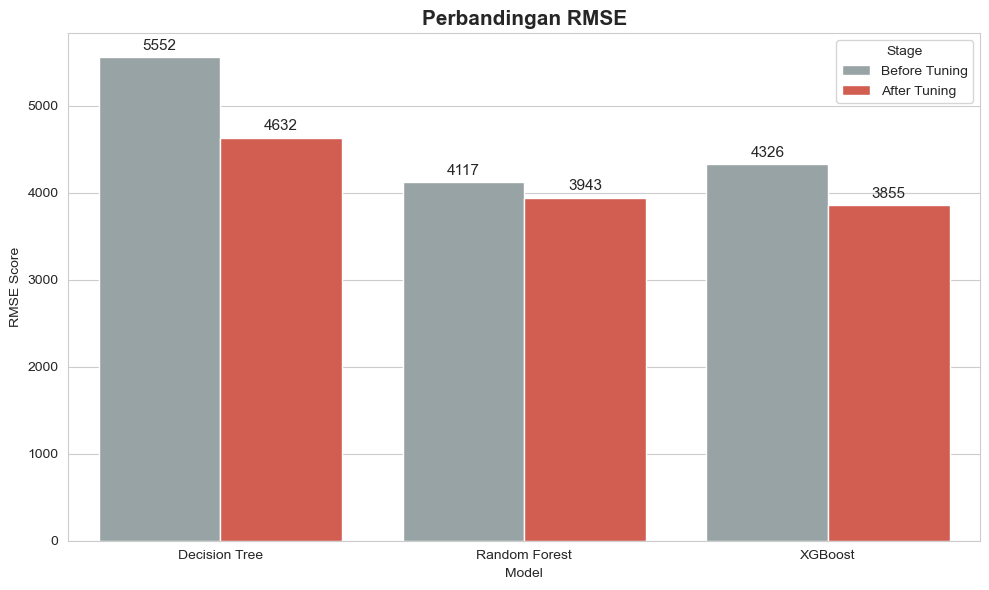

In [87]:
# --- GRAFIK 1: RMSE ---
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(data=df_combined, x='Model', y='RMSE', hue='Stage', palette=colors_rmse)
plt.title('Perbandingan RMSE', fontsize=15, fontweight='bold')
plt.ylabel('RMSE Score')
plt.legend(title='Stage')

for container in ax1.containers:
    ax1.bar_label(container, fmt='%.0f', padding=3, fontsize=11)
plt.tight_layout()
plt.show() 

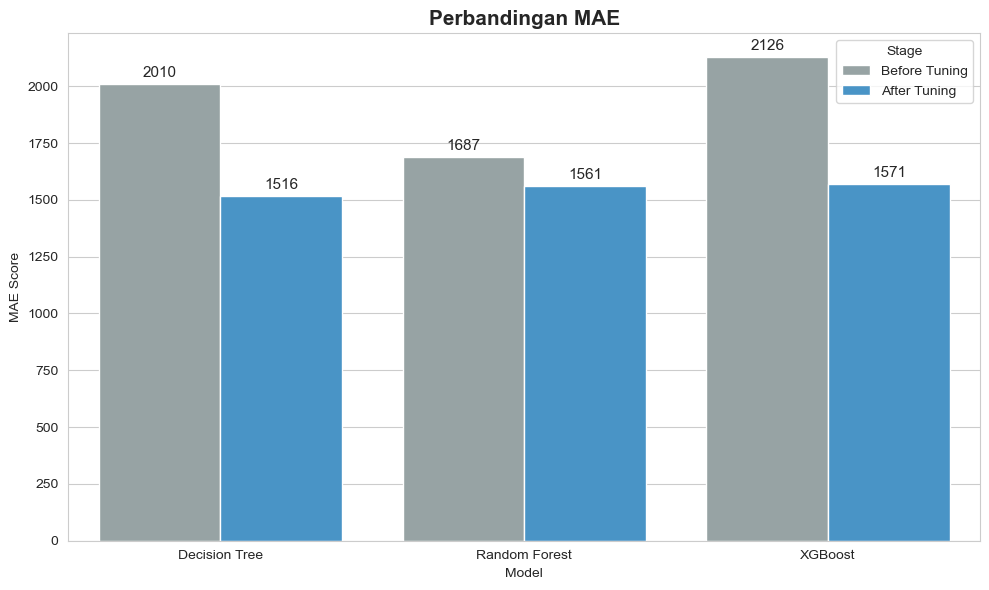

In [88]:
# --- GRAFIK 2: MAE ---
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(data=df_combined, x='Model', y='MAE', hue='Stage', palette=colors_mae)
plt.title('Perbandingan MAE', fontsize=15, fontweight='bold')
plt.ylabel('MAE Score')
plt.legend(title='Stage')

for container in ax2.containers:
    ax2.bar_label(container, fmt='%.0f', padding=3, fontsize=11)
plt.tight_layout()
plt.show()

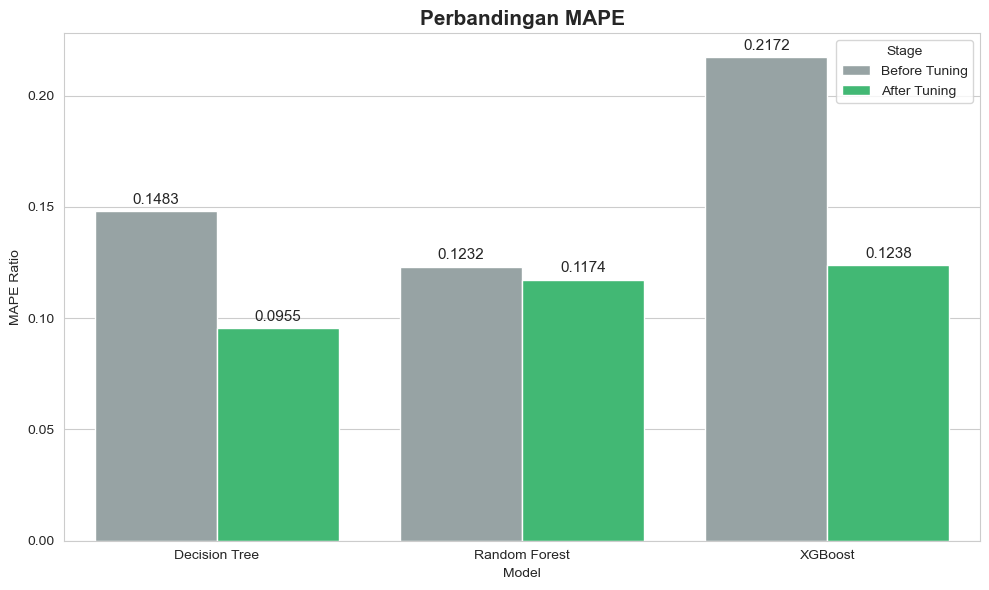

In [89]:
# --- GRAFIK 3: MAPE ---
plt.figure(figsize=(10, 6))
ax3 = sns.barplot(data=df_combined, x='Model', y='MAPE', hue='Stage', palette=colors_mape)
plt.title('Perbandingan MAPE', fontsize=15, fontweight='bold')
plt.ylabel('MAPE Ratio')
plt.legend(title='Stage')
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.4f', padding=3, fontsize=11)
plt.tight_layout()
plt.show() 

In [56]:
# --- Tabel Improvement ---
df_pivot = df_combined.pivot(index='Model', columns='Stage', values=['RMSE', 'MAE', 'MAPE'])

df_pivot[('RMSE', 'Improvement %')] = (df_pivot[('RMSE', 'Before Tuning')] - df_pivot[('RMSE', 'After Tuning')]) / df_pivot[('RMSE', 'Before Tuning')] * 100
df_pivot[('MAE', 'Improvement %')] = (df_pivot[('MAE', 'Before Tuning')] - df_pivot[('MAE', 'After Tuning')]) / df_pivot[('MAE', 'Before Tuning')] * 100
df_pivot[('MAPE', 'Improvement %')] = (df_pivot[('MAPE', 'Before Tuning')] - df_pivot[('MAPE', 'After Tuning')]) / df_pivot[('MAPE', 'Before Tuning')] * 100

print("\n=== PERSENTASE PENINGKATAN (IMPROVEMENT) ===")
pd.set_option('display.float_format', '{:.4f}'.format)

cols_to_show = [
    ('RMSE', 'Improvement %'), 
    ('MAE', 'Improvement %'), 
    ('MAPE', 'Improvement %')
]
display(df_pivot[cols_to_show])


=== PERSENTASE PENINGKATAN (IMPROVEMENT) ===


,RMSE,MAE,MAPE
Stage,Improvement %,Improvement %,Improvement %
Model,,,
Decision Tree,16.5822,24.5580,35.6162
Random Forest,4.2445,7.4547,4.7167
XGBoost,10.9047,26.1351,43.0003


XGBoost memiliki improvement tertinggi namun tetap kalah skornya dengan Decision Tree yang memiliki nilai MAPE terendah (0.0953) dan MAE terendah (1500.74) dibandingkan dua pesaingnya.
Ini artinya, untuk memprediksi nilai pelanggan sehari-hari, Decision Tree adalah yang paling akurat dan konsisten.


Nilai RMSE pada Decision Tree lebih tinggi daripada kedua pesaingnya. Decision Tree mungkin melakukan beberapa kesalahan fatal pada data pencilan (outlier/pelanggan "Sultan" yang nilainya ekstrem), sehingga RMSE-nya melonjak. Namun, untuk mayoritas pelanggan biasa, Decision Tree menebak paling tepat. Namun, karena tujuan bisnisnya adalah untuk generalisasi untuk banyak pelanggan maka Decision Tree tetap sebagai pemenang karena MAPE-nya di bawah 10%.


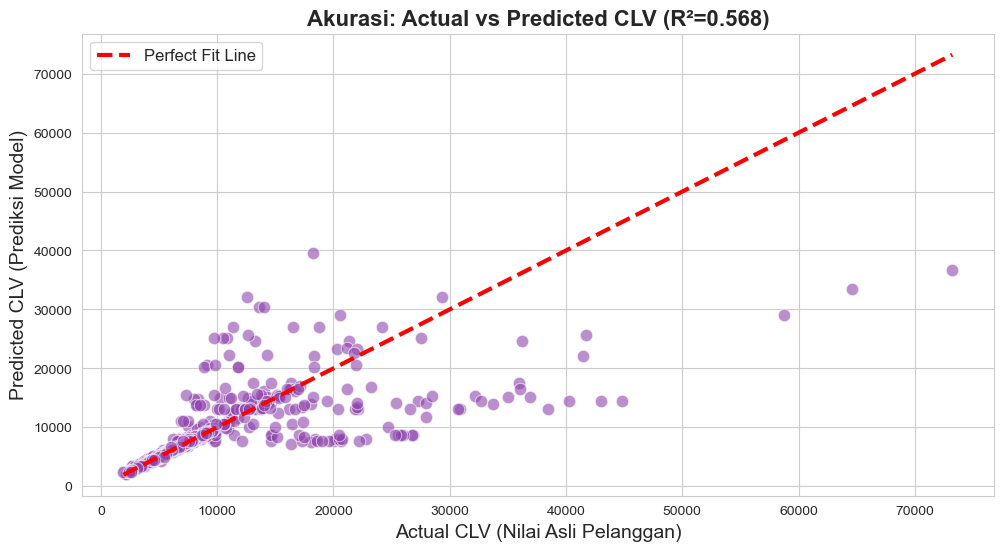

In [78]:
from sklearn.metrics import r2_score
y_pred_clv = best_models['Decision Tree'].predict(X_test)

df_viz_clv = pd.DataFrame({
    'Actual CLV': y_test.values.flatten(),   
    'Predicted CLV': y_pred_clv              
})

score_r2 = r2_score(y_test, y_pred_clv)

plt.figure(figsize=(40, 6))
sns.set_style("whitegrid")

# --- GRAFIK 1: SCATTER PLOT (ACTUAL VS PREDICTED) ---
plt.subplot(1, 3, 1)
sns.scatterplot(data=df_viz_clv, x='Actual CLV', y='Predicted CLV', alpha=0.6, color='#8e44ad', s=80) 

min_val = min(df_viz_clv['Actual CLV'].min(), df_viz_clv['Predicted CLV'].min())
max_val = max(df_viz_clv['Actual CLV'].max(), df_viz_clv['Predicted CLV'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=3, label='Perfect Fit Line')

plt.title(f'Akurasi: Actual vs Predicted CLV (R²={score_r2:.3f})', fontsize=16, fontweight='bold')
plt.xlabel('Actual CLV (Nilai Asli Pelanggan)', fontsize=14)
plt.ylabel('Predicted CLV (Prediksi Model)', fontsize=14)
plt.legend(fontsize=12)
plt.show()

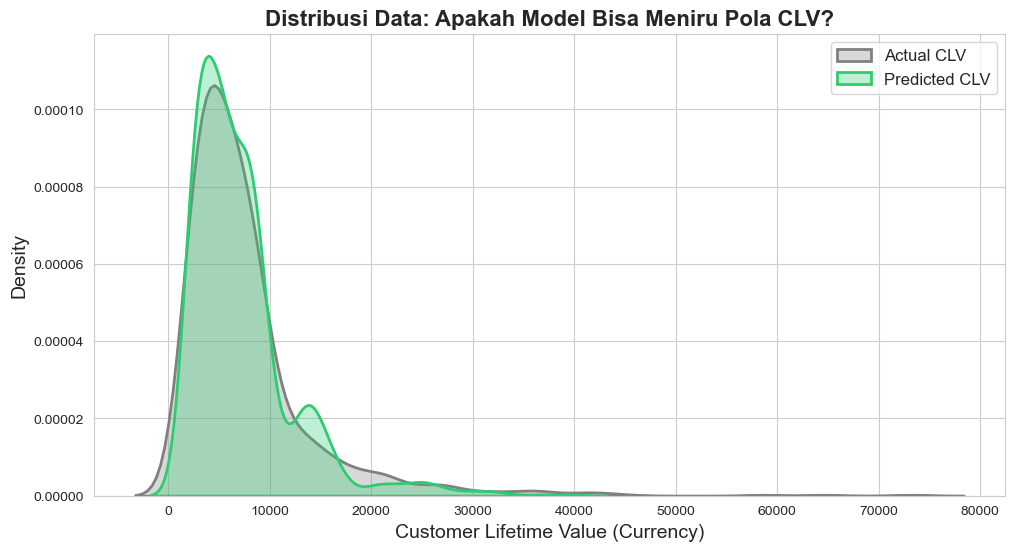

In [79]:
# --- GRAFIK 2: DISTRIBUTION PLOT (DENSITY) ---
plt.figure(figsize=(40, 6))
plt.subplot(1, 3, 2)
sns.kdeplot(df_viz_clv['Actual CLV'], fill=True, color='grey', label='Actual CLV', alpha=0.3, linewidth=2)
sns.kdeplot(df_viz_clv['Predicted CLV'], fill=True, color='#2ecc71', label='Predicted CLV', alpha=0.3, linewidth=2)

plt.title('Distribusi Data: Apakah Model Bisa Meniru Pola CLV?', fontsize=16, fontweight='bold')
plt.xlabel('Customer Lifetime Value (Currency)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.show()

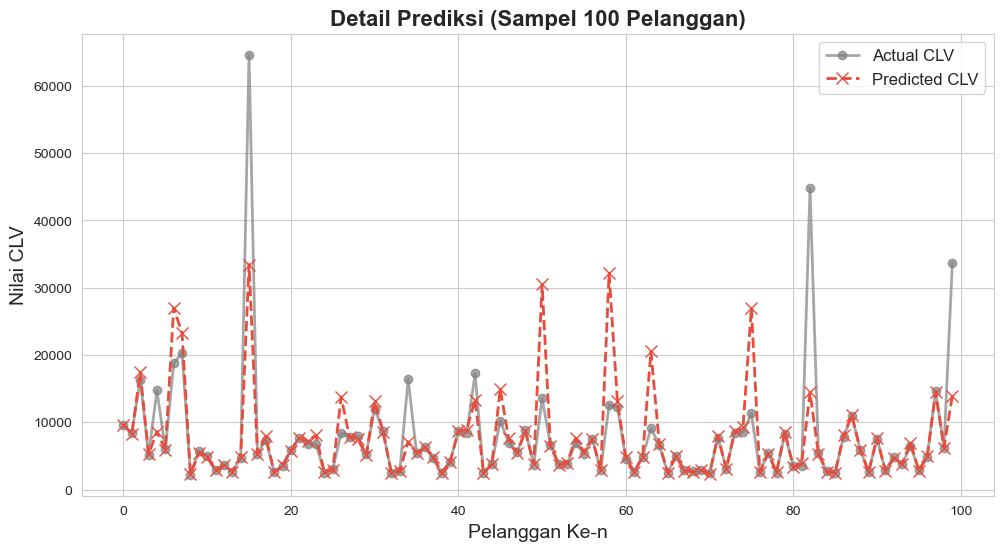

In [80]:
# --- GRAFIK 3: LINE PLOT ---
plt.figure(figsize=(40, 6))
plt.subplot(1, 3, 3)
subset = df_viz_clv.head(100).reset_index(drop=True)

plt.plot(subset['Actual CLV'], label='Actual CLV', marker='o', color='grey', linestyle='-', alpha=0.7, linewidth=2)
plt.plot(subset['Predicted CLV'], label='Predicted CLV', marker='x', color='#e74c3c', linestyle='--', linewidth=2, markersize=8)

plt.title('Detail Prediksi (Sampel 100 Pelanggan)', fontsize=16, fontweight='bold')
plt.xlabel('Pelanggan Ke-n', fontsize=14)
plt.ylabel('Nilai CLV', fontsize=14)
plt.legend(fontsize=12)
plt.show()

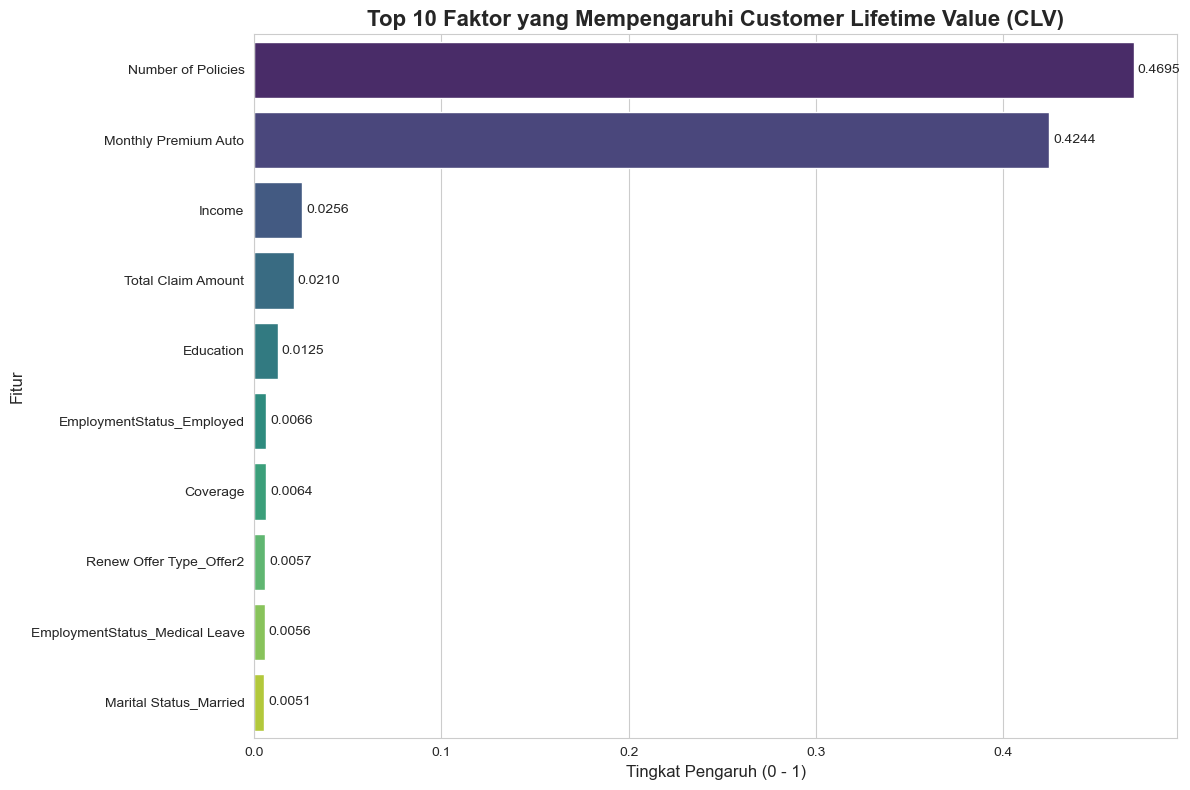


=== DETAIL FAKTOR PENENTU CLV ===


,Feature,Importance,Cumulative
0,Number of Policies,0.4695,0.4695
1,Monthly Premium Auto,0.4244,0.8940
2,Income,0.0256,0.9196
3,Total Claim Amount,0.0210,0.9406
4,Education,0.0125,0.9531
5,EmploymentStatus_Employed,0.0066,0.9597
6,Coverage,0.0064,0.9661
7,Renew Offer Type_Offer2,0.0057,0.9719
8,EmploymentStatus_Medical Leave,0.0056,0.9774
9,Marital Status_Married,0.0051,0.9826


In [83]:

model_pipeline = best_models['Decision Tree'] 

preprocessor = model_pipeline.named_steps['preprocessor']
regressor = model_pipeline.named_steps['model']

try:
    feature_names = preprocessor.get_feature_names_out()
except AttributeError:

    feature_names = num_cols.tolist() + list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols))

clean_feature_names = [name.split('__')[-1] for name in feature_names]

importance_values = regressor.feature_importances_

df_importance = pd.DataFrame({
    'Feature': clean_feature_names,
    'Importance': importance_values
})

df_importance = df_importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)

df_importance['Cumulative'] = df_importance['Importance'].cumsum()

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

top_features = df_importance.head(10)

ax = sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')

plt.title('Top 10 Faktor yang Mempengaruhi Customer Lifetime Value (CLV)', fontsize=16, fontweight='bold')
plt.xlabel('Tingkat Pengaruh (0 - 1)', fontsize=12)
plt.ylabel('Fitur', fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', padding=3)

plt.tight_layout()
plt.show()

print("\n=== DETAIL FAKTOR PENENTU CLV ===")
display(df_importance.head(10))

In [86]:
# Cek statistik data asli (y_test)
rata_rata_clv = y_test.mean()
min_clv = y_test.min()
max_clv = y_test.max()

print(f"Rata-rata CLV Pelanggan : {rata_rata_clv:,.2f}")
print(f"CLV Tertinggi (Outlier)  : {max_clv:,.2f}")
print("-" * 45)
print(f"Error Rata-rata (MAE)   : {1501.2062:,.2f}")
print(f"Persentase Error (MAPE) : {0.0951 * 100:.2f}%")

Rata-rata CLV Pelanggan : 7,748.80
CLV Tertinggi (Outlier)  : 73,225.96
---------------------------------------------
Error Rata-rata (MAE)   : 1,501.21
Persentase Error (MAPE) : 9.51%


## **Conclusion**

Berdasarkan hasil eksperimen dan analisis data yang telah dilakukan, berikut adalah korelasi antara tujuan awal proyek dengan hasil akhir yang diperoleh:

1. Decision Tree Regressor sebagai model final yang paling optimal

    Setelah melalui tahapan benchmarking dan hyperparameter tuning, model ini terbukti mampu memprediksi angka Customer Lifetime Value (CLV) dengan tingkat kesalahan rata-rata atau Mean Absolute Percentage Error (MAPE) sebesar 9.53% pada data uji. Capaian error di bawah 10% ini mengindikasikan bahwa model memiliki reliabilitas yang sangat tinggi untuk digunakan sebagai alat bantu pengambilan keputusan, karena mampu memproyeksikan nilai pelanggan dengan deviasi yang minim.

2. Number of Policies dan Monthly Preimum Auto menjadi faktor utama penentu CLV

    Hasil analisis menunjukkan bahwa hampir 90% variabilitas CLV dikendalikan secara dominan oleh dua fitur perilaku, yaitu Number of Policies (Jumlah Polis) dan Monthly Premium Auto (Besaran Premi). Temuan ini memberikan wawasan krusial bahwa loyalitas pelanggan yang tercermin dari kepemilikan jumlah produk jauh lebih signifikan pengaruhnya dibandingkan latar belakang pendidikan atau status pernikahan.

3. Strategi Cross-selling menjadi strategi terbaik untuk meningkatkan CLV

    Penemuan bahwa "Number of Policies" adalah faktor terkuat menjadi landasan bagi tim marketing untuk mengubah strategi dari sekadar akuisisi pelanggan baru menjadi fokus pada retensi dan ekspansi portofolio pelanggan lama. Strategi Cross-Selling melalui paket bundling asuransi kini direkomendasikan sebagai prioritas utama, karena data membuktikan bahwa mendorong pelanggan untuk memiliki lebih dari satu polis adalah cara paling efektif untuk melipatgandakan nilai CLV mereka.
    

## **Recommendation**

Rekomendasi Pengembangan Proyek (Future Works)
Meskipun model Decision Tree yang dibangun telah mencapai akurasi yang baik (MAPE ~9.5%), proyek ini masih memiliki beberapa keterbatasan yang dapat diperbaiki di masa depan. Berikut adalah langkah-langkah strategis untuk menyempurnakan proyek ini:

1. Penanganan Keterbatasan Data (Data Limitations)
    Saat ini, model hanya mengandalkan data transaksional dan demografis statis. Untuk menangkap perilaku pelanggan yang lebih dinamis, disarankan untuk melakukan:

- Feature Enrichment (Pengayaan Fitur): Menambahkan variabel perilaku (behavioral data), seperti frekuensi interaksi pelanggan dengan Customer Service, sentimen keluhan, atau riwayat kunjungan ke aplikasi/website perusahaan. Data interaksi seringkali menjadi indikator kuat potensi churn atau loyalitas yang tidak tertangkap oleh data transaksi biasa.

- Integrasi Data Eksternal: Memasukkan indikator makroekonomi (seperti tingkat inflasi atau suku bunga) yang mungkin mempengaruhi daya beli nasabah dalam jangka panjang.


  

2. Peningkatan Kompleksitas Model (Model Limitations)
    Model saat ini terpaku pada algoritma Single Estimator (Decision Tree) yang, meskipun akurat, memiliki risiko instabilitas jika data berubah drastis. Pengembangan selanjutnya dapat mencakup:

- Ensemble Stacking: Menggabungkan kekuatan prediksi dari beberapa model sekaligus (misalnya: hasil prediksi Decision Tree, Random Forest, dan XGBoost dirata-rata atau diberi bobot) untuk menciptakan "Super Model" yang lebih tahan banting (robust) terhadap variansi data baru.

- Deep Learning: Jika volume data pelanggan bertambah menjadi jutaan baris di masa depan, penggunaan Neural Networks dapat dipertimbangkan untuk menangkap pola non-linear yang sangat kompleks yang mungkin terlewat oleh model berbasis pohon.


  

3. Implementasi dan Skalabilitas (Time & Scope Limitations)
    Karena keterbatasan waktu, proyek ini baru sampai pada tahap prototyping di dalam Notebook. Agar memberikan dampak bisnis nyata, langkah selanjutnya adalah:

- Model Deployment & API: Mengemas model ke dalam bentuk API (Application Programming Interface) agar dapat diakses secara real-time oleh sistem Dashboard Tim Sales. Hal ini memungkinkan sales mengetahui prediksi CLV seorang nasabah detik itu juga saat sedang melayani mereka.

- Automated Retraining (MLOps): Membangun pipa otomatisasi yang melatih ulang model secara berkala (misalnya setiap bulan) dengan data terbaru. Ini penting untuk mencegah penurunan performa model (model drift) seiring berjalannya waktu dan perubahan tren pasar.

- Simulasi Bisnis ("What-If Analysis"): Mengembangkan alat simulasi interaktif bagi tim marketing untuk menjawab pertanyaan strategis, seperti: "Jika kita berhasil membuat pelanggan ini membeli satu polis tambahan, berapa kenaikan nilai CLV-nya?". Ini mengubah model pasif menjadi alat perencanaan strategi aktif.

## **Save Model**

In [93]:
import pickle

final_model = best_models['Decision Tree']
filename = 'Model_CLV_DecisionTree.pkl'

with open(filename, 'wb') as file:
    pickle.dump(final_model, file)

print(f"Model Tersimpan: {filename}")

Model Tersimpan: Model_CLV_DecisionTree.pkl


In [94]:
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

print("Model berhasil dimuat!")
print(f"Tipe Object: {type(loaded_model)}")

sample_data = X_test.iloc[0:1]
prediksi_sample = loaded_model.predict(sample_data)

print(f"Prediksi CLV untuk data pertama: {prediksi_sample[0]:,.2f}")

Model berhasil dimuat!
Tipe Object: <class 'sklearn.pipeline.Pipeline'>
Prediksi CLV untuk data pertama: 9,600.29
